# Empalme con la clase anterior: GANs  Generative Adversarial Networks.
El trabajo se desarrolló  por Ian J. Goodfellow et al. 2014

[27] Ian Goodfellow, Jean Pouget-Abadie, Mehdi Mirza, Bing Xu, David Warde-Farley,
Sherjil Ozair, Aaron Courville, and Yoshua Bengio. Generative adversarial nets. In
Z. Ghahramani, M. Welling, C. Cortes, N. D. Lawrence, and K. Q. Weinberger, edi-
tors, Advances in Neural Information Processing Systems 27, pages 2672–2680. Curran
Associates, Inc., 2014.

Los GANs consisten en 2 redes.

* La red discriminadora $D$
* La red generadora $G$.

Piense en el detective ($D$) y el falsificador $G$.
El falsificador falsica (Genera) una firma (falsa),
el detective $D$ debe decir si es real o "fake". (1, 0).

Ahi interacción entre ambos. Inicialmente el generador genera ruido y para el detective es fácil identificar que la firma es falsa. Pero mediante el entrenamiento, el generador $G$ receive "feedback" del detective y aprende. La probabilidad de mejorar es buena. Veamos el concepto en gráficas.

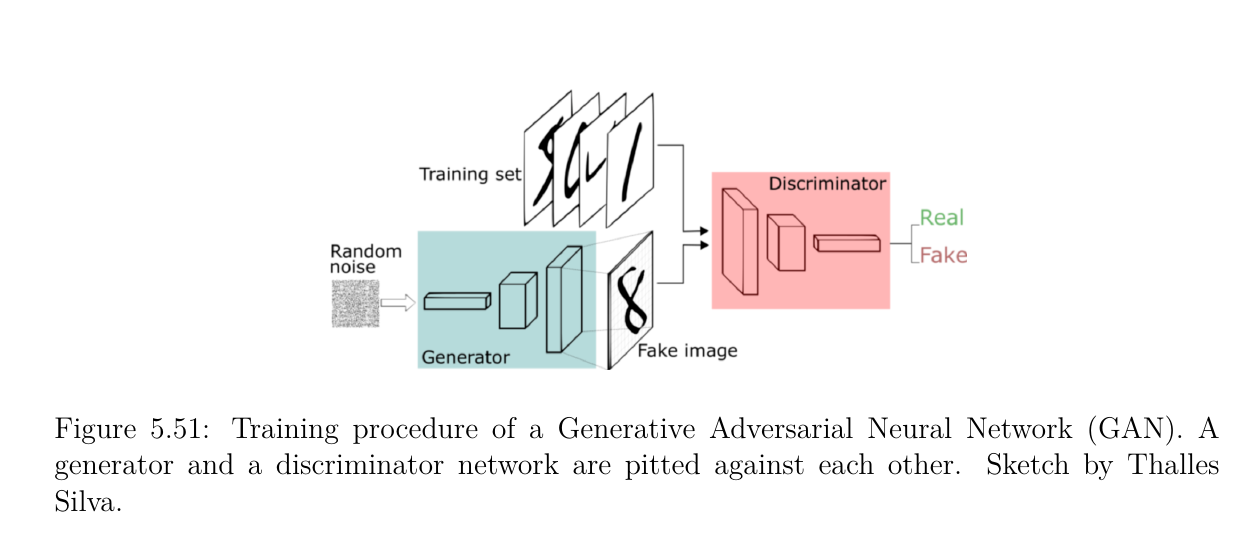

La Figura 5.51 ilustra GANs. La explique oralmente.

La Figura 5.52 es mas estadística. Al fin y al cabo los GANS manejan probabilidades. La explico oralmente.

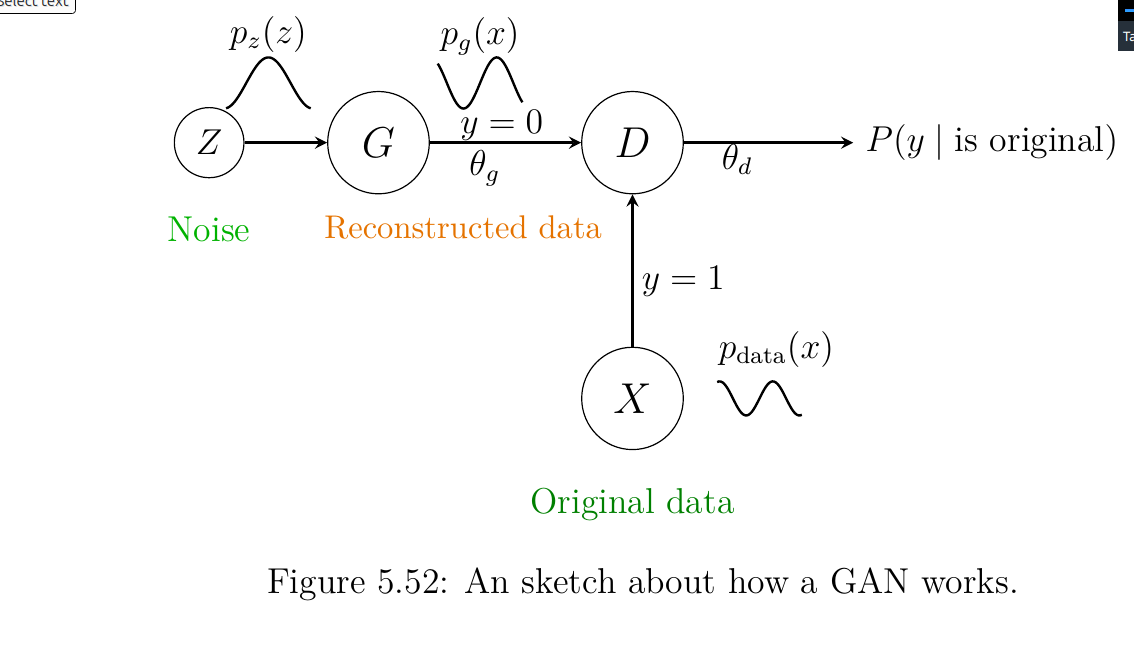

El link
[this person does not exist](https://thispersondoesnotexist.com/)  usa GANs para generar caras no existentes de personas no existentes.

## Matemática de los GANS (comienzo).
Queremos construir la función de costo para los GANs.
Iniciamos con la siguiente función de costo que es como un
cross-entropy.

$$\log D(x) + \log (1 - D( G(z)) $$
Cuando $x$ es una muestra real, $z$ es "fake ".
El Discriminador $D$ quiere maximizar esta función.

De otro lado para el generador quiere minimizar

$$\log (1 - D(G(z)) $$

Todo esto corresponde a una sola muestra. Como tenemos un conjunto de muestras debemos usar una medida que puede ser la esperanza.

Para el discriminador queremos maximizar

$$\mathbb{E}_{x \sim p_{data}} [ \log D(x)] + E_{z \sim p} [ \log (1 - D(G(z))] \tag{4}$$

La Ecuacion (4) se calcula en el discreto con la fomula

$$\sum_{i=1}^m \log D(x_i) p_{data(x)} + [ \log (1 - D(G_{z_i})] p(z) $$

Hasta donde vamos esta es la función de costo (pérdida) para el discriminador.

DE la misma forma el generador quiere minimizar

$$\mathbb{E}_{z \sim p_z} [ \log (1 - D(G(z))] $$

De forma explícita (en el discreto)
$$\sum_{i=1}^n \log (1 - D( G( z))) p_{z_i} \tag{1} $$

Arjovsky and Botton, muestran que cuando el discriminador hace un buen grabajo entones el gradiente de esta función de costo
se acerca a 0. Caemos al problema del **vanishing gradient**.

Más específicamente

$$\lim_{ \| D - D^* \| \to 0 } \nabla_\theta \mathbb{E}_{z \to p(z)}  [ \log(1 - D(G_\theta(z)))] = 0 . \tag{3} $$
Explicamos más adelante quien es $D^*$. Ellos sugieren que en vez de minimizar (1) ellos sugieren que se minice

$$\min_G \mathbb{E}_{z \sim p_z} [ - \log D(G(z))]  \tag{5} $$

La combinación de la (4) y la (5), en un caso maximizar y en el  otro minizar da lugar al problema del **Minimax objective function for a two-player game**.


$$\min_G \max_D \mathbb{E}_{x \sim p_{data}} [\log D(x)]] + \mathbb{E}_{z \sim p_z}[ \log (1 - D(G(z)))]. $$

En la practica implementamos esto como dos optimizaciones separadas.  Por que razón.

1. Es más estable si se manejan de forma separada.
2. El flujo del gradiente mejora.

El problema del minimax no conmuta (Metz et al., 2016).
Es decir

$$\min_G \max_D \mathbb{E}_{x \sim p_{data}} [\log D(x)]] + \mathbb{E}_{z \sim p_z}[ \log (1 - D(G(z)))] \ne
\max_D \min_G \mathbb{E}_{x \sim p_{data}} [\log D(x)]] + \mathbb{E}_{z \sim p_z}[ \log (1 - D(G(z)))]
 $$







La idea es
1. Encontrar el máximo sobre $D$ de la función de costo
(4)
$$V_G(D) = \mathbb{E}_{x \sim p_{data}} [ \log D(x)] + E_{z \sim p} [ \log (1 - D(G(z))] $$
donde $G$ es fijo y $D$ varía.  A este máximo lo llamamos
$D^*_G(x)$.

2. Encontrar el mínimo sobre $G$ de $V_G(D^*_G)$.

Vamos a encontrar que

$$D^*_G(x) = \frac{p_{data}(x)}{p_{data}(x) + p_g(x)} $$

Para esto seguiemos el artículo de Goodfellow y amigos. La esperanza en el continuo.

1.


\begin{eqnarray}
V_G(D) &=& \int_x \log D(x) p_{data}(x) dx + \int_z \log(1 - D(g(z))) p_z(z) dz  \\
&=& \int_x [  \log D(x) p_{data}(x) + \log(1 - D(x)) p_g(x)] dx
\end{eqnarray}
Por qué ? yo puedo cambiar $p_z(z)$ por $p_g(x)$?

Maximizar la integral es maximizar su integrando.

El integrando lo llamamos  $f$ y escribimos

$$f(D(x)) = \log D(x) p_{data}(x) + \log (1 - D(x)) p_g(x). $$
Debemos tomar la derivada con respecto a $D$ y hacerla 0.

$$\frac{d}{d D(x)} f(D(x)) = \frac{p_{data}(x)}{D(x)} - \frac{p_g(x)}{1 - D(x)} = 0. \tag{6} $$

Normalmente en máximos/mínimos requerimos de la segunda derivada para saber si es máximo o mínimo. Pero en este caso como las funciones son logaritmo (concavas) y es máximo.

De la Ecuacion (6), despejamos $D(x)$

\begin{eqnarray}
\frac{p_{data}(x)}{D(x)} &=& \frac{p_g(x)}{1 - D(x)} \\
p_{data}(x) (1 - D(x)) &=& p_g(x) D(x)  \\
p_{data}(x) &=& (p_{data}(x) + p_g(x)) D(x) \\
D(x) &=&  \frac{p_{data}(x)}{p_{data}(x) + p_g(x)}
\end{eqnarray}


Llamamos

$$
D^*(x) =  \frac{p_{data}(x)}{p_{data}(x) + p_g(x)} \tag{7}
$$

2. Llamamos $C(G) = \max_D V_G(D)$
Es decir

\begin{eqnarray}
C(G) &=& \max_D V_G(D) \\
&=& \mathbb{E}_{x \sim p_{data}} [ \log D^*_G (x)] + \mathbb{E}_{z \sim p_z} [ \log (1 - D^*_G(G(z)))] \\
&=& \mathbb{E}_{x \to p_{data}} \left [
\log \frac{p_{data}(x)}{p_{data(x)} + p_g(x)}    \right ]
+ \mathbb{E}_{x \sim p_g} \left [
 \log \frac{p_g(x)}{p_{data}(x) + p_g(x)} \right ] \\
 &=&
\mathbb{E}_{x \to p_{data}} \left [
\log 2 \frac{p_{data}(x)}{p_{data(x)} + p_g(x)}    \right ]
+ \mathbb{E}_{x \sim p_g} \left [
 \log 2 \frac{p_g(x)}{p_{data}(x) + p_g(x)} \right ]   - 2 \log 2 \\
&=& \mathbb{E}_{x \to p_{data}} \left [
\log  \frac{p_{data}(x)}{\frac{p_{data(x)} + p_g(x)}{2}}    \right ]
+ \mathbb{E}_{x \sim p_g} \left [
 \log  \frac{p_g(x)}{\frac{p_{data}(x) + p_g(x)}{2}} \right ]   - 2 \log 2 \\
 &=& D_{KL} \left (
    p_{data}(x) \parallel \frac{p_{data}(x) + p_g(x)}{2}
    \right ) + D_{KL} \left (
       p_{g(x)} \parallel \frac{p_{data(x) + p_g(x)}}{2} \right ) - 2 \log 2
\end{eqnarray}




Para poder interpretar y minimzar esta expresión sobre $G$ introducimos

### Jensen-Shannon Divergence:
Es la forma simetrizada dela KL, no es negativa.
La definición es

$$D_{JS}( P \parallel Q)  = \frac12 D_{KL} ( P \parallel M) + \frac12 D_{KL} ( Q \parallel M) $$
donde

$$M = \frac12 ( P  + Q )  $$
Esta divergencia tiene dos propiedades interesantes

* **Simetria**: Es facil verificar que $D_{JS}(P \parallel Q) = D_{JS} ( Q \parallel P)$

* **Acotamiento y no-negatividad**: Esta divergencia está en intervalo $[0,1]$, pero más aun $[0, \log 2]$. (tarea para el estudiante).

Por último

$$D_{JS} ( P \parallel Q) = 0 \quad , \text{si y solo si} \quad P=Q \tag{8} $$

En palabras la $D_{JS}$ es el promedio entre las divergencias $D_{KL}$ entre las dos tribuciones $P,Q$ y su media $(P+Q)/2$.

Reescribimos

$$C(G) = 2 D_{JS} ( p_{data}(x) \parallel p_g(x)) - 2 \log 2 $$
Como queremos el mínimo, este ocurre cuando

$$D_{JS} ( p_{data}(x) \parallel p_g(x)) = 0  $$
Por la propiedad (8) esto ocurre cuando $p_{data}(x)=p_g(x)$.

De donde, reemplazando esto en  (7)

$$ D^*_G(x) = \frac12 $$
en el punto óptimo que maximiza $D$ y minimiza $G$.

La Figura 5.54 ilustra esto.

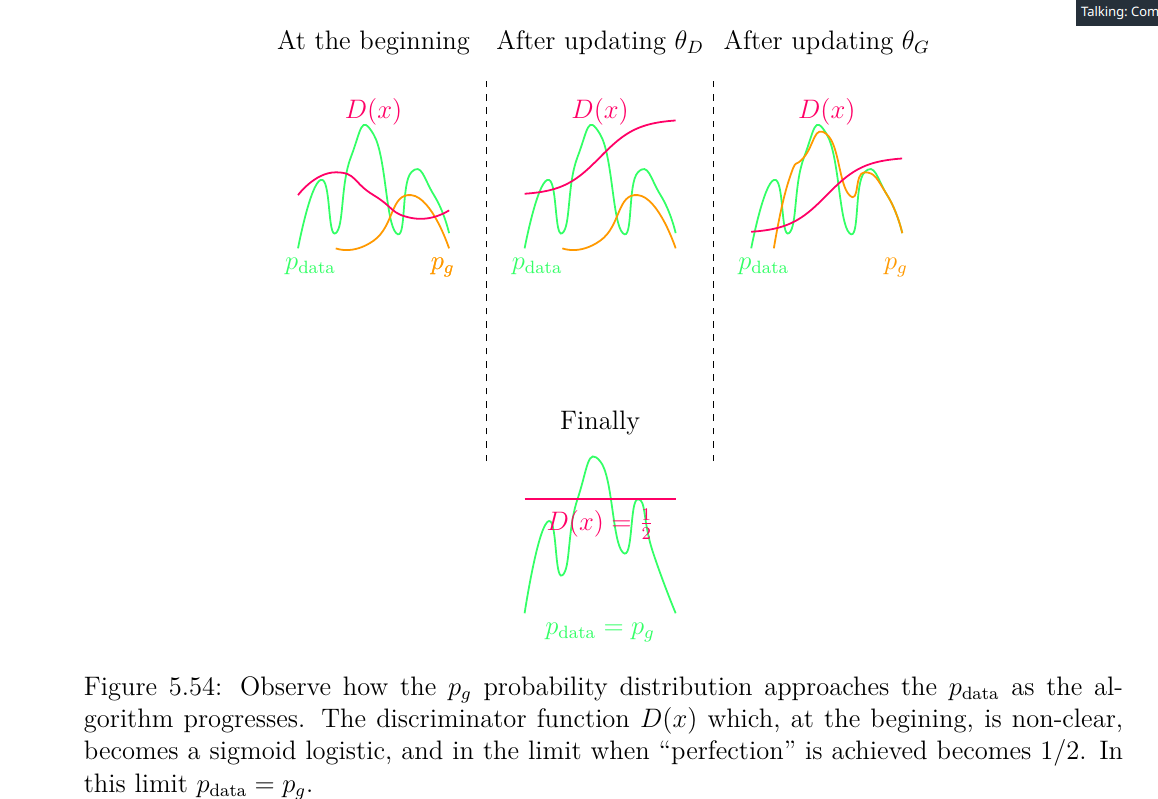

El algoritmo lo muestro en la próxima celda.

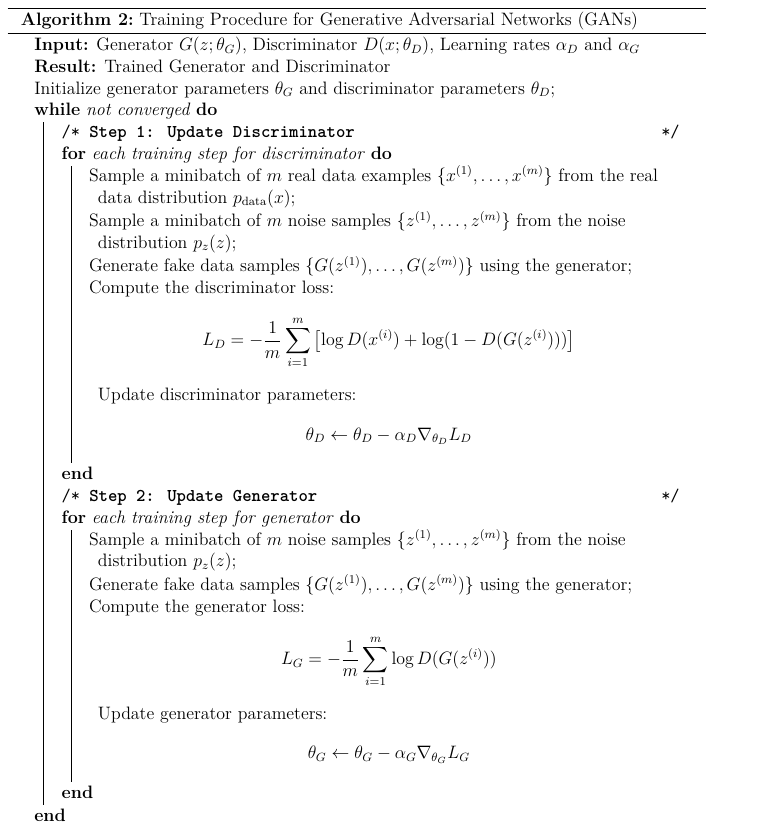

Puede hacer varios "updates" del discrimandor y pasar al generador. Luego la iteración entre uno y el otro, debería, de acuerdo a la teoría explicada arriba converger al punto de que $p_{data}(x)=p_g(x)$, o $D(x)=1/2$.